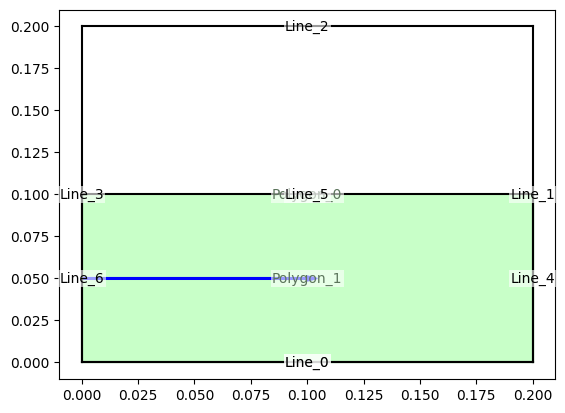

In [1]:
import fluid_fvm.physics as ph
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms
import fluid_fvm.discretization as dc
import numpy as np

a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.1), geo.Vector(0,0.1)])])
a.assemble()

mat = pr.Material("test", mu = 1, rho = 156, color = "#ffbbcc")
mat2 = pr.Material("test2", mu = 1, rho = 1056, color = "#ff11cc")

comp = pr.Component()

comp.setAssembly(a)
comp.assignMaterial("Polygon_0", mat)
comp.assignMaterial("Polygon_1", mat2)



mesh_c = ms.RectangularConfig(20,20)
comp.setMesh(mesh_c)

bcdict = {"Line_0" : ph.Boundary("Dirichlet", 0),
          "Line_1" : ph.Boundary("Neumann", 0),
          "Line_2" : ph.Boundary("Dirichlet", 0),
          "Line_3" : ph.Boundary("Neumann", 0),}

flowDirection = geo.Vector(x=1,y = 0)
c = ph.PoissonFlowFixP(a, bcdict, flowDirectionUnitVector=flowDirection, dpdx=10/0.2)


comp.setPhysics(c)
node = 6
neighbour = 3
fig, ax = plt.subplots()

comp.assembly.plot(ax, labels = True)
#mesh_c.plotMesh(ax, vTexts=True)
flowDirection.plotAsVector(ax, vect_0=geo.Vector(0,0.05), scale=0.1)

Node:0  Neighbour: 0 Nwighbour idx: []
Self[[2.]]
Neighbour:0
Const:[0.]
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[0.]]
Neighbour:[[-0.]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 19
Self[[0.01052632]]
Neighbour:[[-0.01052632]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self0
Neighbour:0
Const:0.0
---------------
Node:1  Neighbour: 0 Nwighbour idx: []
Self[[2.]]
Neighbour:0
Const:[0.]
---------------
Node:1  Neighbour: 1 Nwighbour idx: 2
Self[[0.]]
Neighbour:[[-0.]]
Const:0
---------------
Node:1  Neighbour: 2 Nwighbour idx: 20
Self[[0.01052632]]
Neighbour:[[-0.01052632]]
Const:0
---------------
Node:1  Neighbour: 3 Nwighbour idx: 0
Self[[0.]]
Neighbour:[[-0.]]
Const:0
---------------
Node:2  Neighbour: 0 Nwighbour idx: []
Self[[2.]]
Neighbour:0
Const:[0.]
---------------
Node:2  Neighbour: 1 Nwighbour idx: 3
Self[[0.]]
Neighbour:[[-0.]]
Const:0
---------------
Node:2  Neighbour: 2 Nwighbour idx: 21
Self[[0.01052632]]
Neighbour:[[

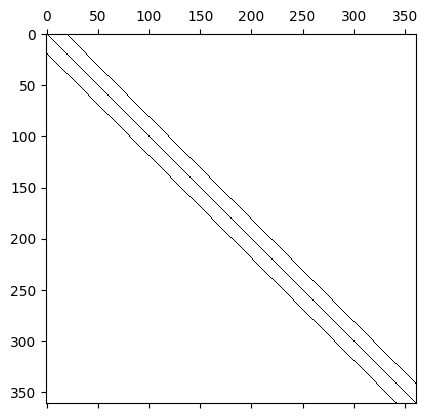

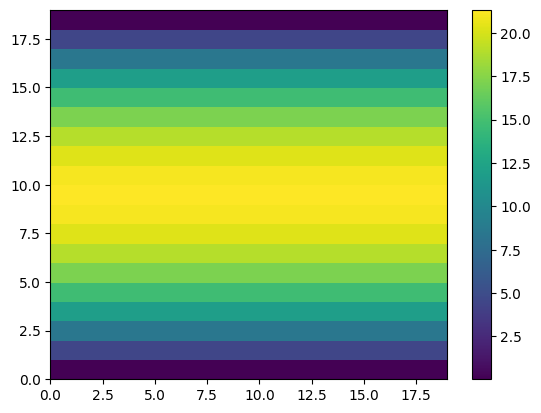

In [2]:
disc = dc.LinearFullDiscretizer(comp,1)
disc.discretize()
plt.spy(disc.Amrx)
res_math = np.linalg.solve(disc.Amrx, disc.Bmrx)


res = np.zeros((mesh_c.vyNum, mesh_c.vxNum))
for i in range(mesh_c.getVolumeNodeNum()):
        res[mesh_c.math2geoVolume(i)] = res_math[i]

fig, ax = plt.subplots()

pl = plt.pcolor(res)
fig.colorbar(pl,)
print(disc.Bmrx)
#print(res)


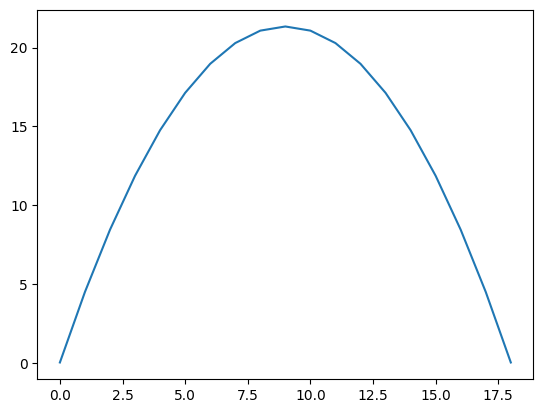

In [3]:
plt.plot(res[:,1])

In [4]:
zr = np.zeros((2,5))
a=1
zr[1,a:(a+3)] = [5,6,7]
zr

array([[0., 0., 0., 0., 0.],
       [0., 5., 6., 7., 0.]])

Node:0  Neighbour: 0 Nwighbour idx: []
Self[ 2.  0. -0.]
Neighbour:[0 0 0]
Const:-0.0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[ 1.         0.        -0.0025641]
Neighbour:[-1.         0.        -0.0025641]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 39
Self[ 1.  0. -0.]
Neighbour:[-1.  0. -0.]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self[2.         0.         0.00512821]
Neighbour:[0 0 0]
Const:10.0
---------------
Node:0  Neighbour: 0 Nwighbour idx: []
Self[0.         2.         0.00512821]
Neighbour:[0 0 0]
Const:[-0.]
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[ 0.  1. -0.]
Neighbour:[ 0. -1. -0.]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 39
Self[ 0.         1.        -0.0025641]
Neighbour:[ 0.        -1.        -0.0025641]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self[ 0.  2. -0.]
Neighbour:[0 0 0]
Const:[-0.]
---------------
Node:0  Neighbour: 0 Nwighbour idx: []
Self[0 

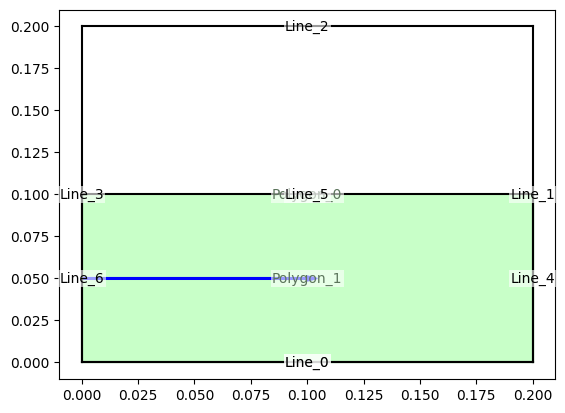

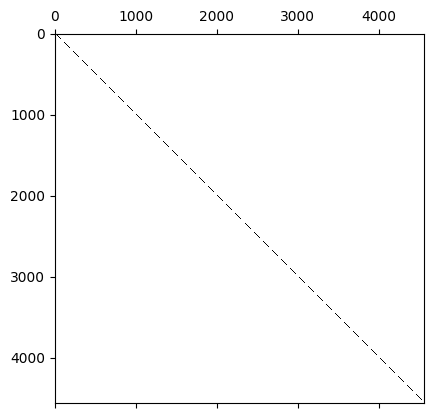

In [5]:
a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.1), geo.Vector(0,0.1)])])
a.assemble()
mat = pr.Material("test", mu = 1, rho = 156, color = "#ffbbcc")
mat2 = pr.Material("test2", mu = 1, rho = 1056, color = "#ff11cc")

comp_full = pr.Component()

comp_full.setAssembly(a)
comp_full.assignMaterial("Polygon_0", mat)
comp_full.assignMaterial("Polygon_1", mat2)



mesh_c_full = ms.RectangularConfig(40,40)
comp_full.setMesh(mesh_c_full)

bcdict = {"Line_0" : ph.Boundary("No_slip", 0),
          "Line_1" : ph.Boundary("Pressure_outlet", 2),
          "Line_2" : ph.Boundary("No_slip", 0),
          "Line_3" : ph.Boundary("Velocity_inlet", 5),}

flowDirection = geo.Vector(x=1,y = 0)
c = ph.StokesFlow(a, bcdict)


comp_full.setPhysics(c)
node = 6
neighbour = 3

fig, ax = plt.subplots()

comp_full.assembly.plot(ax, labels = True)
#mesh_c_full.plotMesh(ax, vTexts=True)
flowDirection.plotAsVector(ax, vect_0=geo.Vector(0,0.05), scale=0.1)
disc = dc.LinearFullDiscretizer(comp_full,3)
disc.discretize()
fig, ax = plt.subplots()
plt.spy(disc.Amrx)
res_math = np.linalg.solve(disc.Amrx, disc.Bmrx)








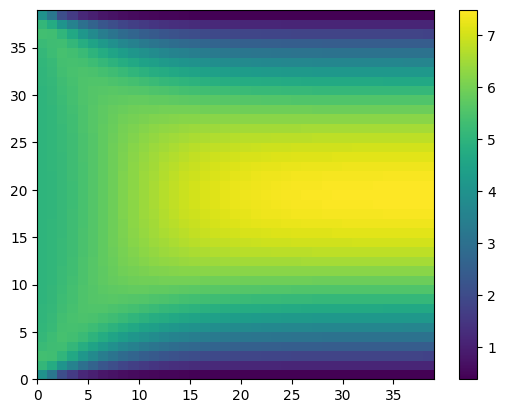

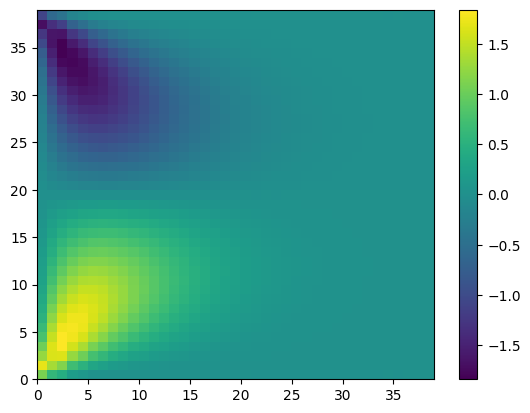

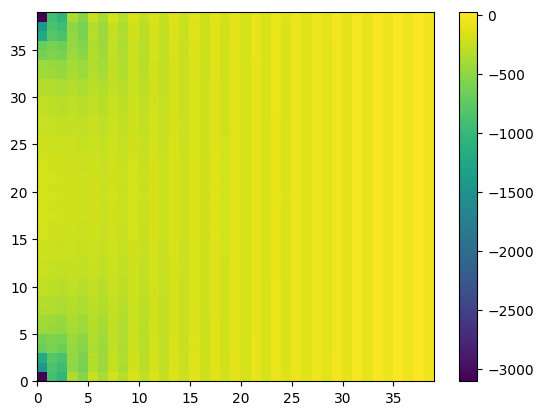

In [6]:
res_u = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_u[mesh_c_full.math2geoVolume(i)] = res_math[i*3]

res_v = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_v[mesh_c_full.math2geoVolume(i)] = res_math[i*3+1]


res_p = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_p[mesh_c_full.math2geoVolume(i)] = res_math[i*3+2]

fig, ax = plt.subplots()

pl = plt.pcolor(res_u)
fig.colorbar(pl,)

fig, ax = plt.subplots()

pl = plt.pcolor(res_v)
fig.colorbar(pl,)

#print(disc.Bmrx)

fig, ax = plt.subplots()

pl = plt.pcolor(res_p)
fig.colorbar(pl,)
#print(res_u)

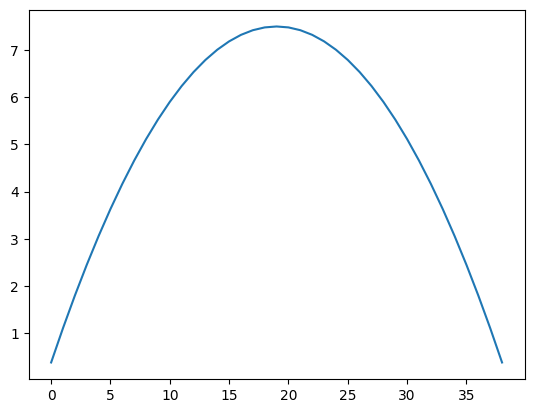

In [7]:
plt.plot(res_u[:,-1])

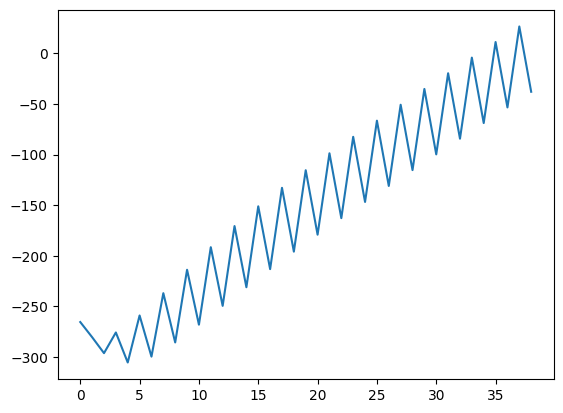

In [8]:
plt.plot(res_p[10,:])

In [9]:
asd = np.array([1,2]) @ np.array([[(-19)],[(5)]])
x = 5
y = 6

res = np.zeros((2,2))
res[:,0] = x
res

array([[5., 0.],
       [5., 0.]])